<div style="font-size:18pt; padding-top:20px; text-align:center">Домашнее задание А1. <b>Индекс реальной зарплаты</b></div><hr>
<div style="text-align:right;">Поляков А.А. <span style="font-style: italic;font-weight: bold;">(группа ИУ6-21М)</span></div>

Подключение стилей оформления

In [2]:
%%html
<link href="css/style.css" rel="stylesheet" type="text/css">

### Вариант 9  <span style="font-style: italic;"> - Дальневосточный регион</span>


In [26]:
surname = "Поляков"  # Ваша фамилия

alph = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [6, 31, 38, 29, 29, 20, 16,  4, 34,  3, 39, 33, 36, 33, 20,  3, 22,
       31,  3, 34, 16, 25, 25, 25, 23, 13, 35, 19, 20, 26, 34, 39,  8]
d = dict(zip(alph, w))
variant =  sum([d[el] for el in surname.lower()]) % 9 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  9


In [13]:
import pandas as pnd
import numpy as np

<p>Создание DataFrame из Excel файла</p>

In [77]:
filePath1 = r"C:/Users/Yoda/Desktop/Assignments-master/data/A1_Analytics/V1_Nom_Salary_By_Regions.xlsx"
filePath2 = r"C:/Users/Yoda/Desktop/Assignments-master/data/A1_Analytics/V1_Index_Price_By_Year.xls" 

# Создание DataFrame из Excel файла
#header=1 - номер строка с названиями столбцов
#skiprows=10 - при чтении файла пропускаются первые n строк 
dfNomSalaryBtRegions = pnd.read_excel(filePath1, header=0, skiprows=4)
dfPriceByYear = pnd.read_excel(filePath2, header=0, skiprows=1)


df1 = dfNomSalaryBtRegions.loc[91-6] #данные по Дальневосточному региону (индекс номинальной зарплаты)
df2 = dfPriceByYear.loc[42-3]        #данные по Дальневосточному региону (индекс потребительских цен)  
df2

Unnamed: 0    Дальневосточный федеральный округ
2002                                        NaN
2003                                        NaN
2004                                        NaN
2005                                        NaN
2006                                     110,57
2007                                     108,29
2008                                     112,69
2009                                     112,87
2010                                     106,66
2011                                     107,75
2012                                     105,29
2013                                     106,53
2014                                     107,23
2015                                      114,5
Name: 39, dtype: object

<p><b>Задача 1.</b> Найти индексы номинальной заработной платы, построить график изменения индекса в процентах (год-изменение индекса в %) </p>

In [15]:
indxs1 = [] # Массив из индексов номинальной заработной платы
for i in range(2002,2015):
    indxs1.append(df1[i]/df1[i-1]*100)

In [16]:
# Структура вывода
df_result_1 = pnd.DataFrame( indxs1[1:13], 
                            columns = ["Индекс номинальной зарплаты"], 
                            index = range(2003, 2015))

df_result_1

,Индекс номинальной зарплаты
2003,126.351792
2004,120.656015
2005,126.249561
2006,119.147716
2007,121.891273
2008,124.324179
2009,111.451851
2010,111.470865
2011,113.579735
2012,114.544146


<p>График изменения индекса в процентах (год-изменение индекса в %)</p> 


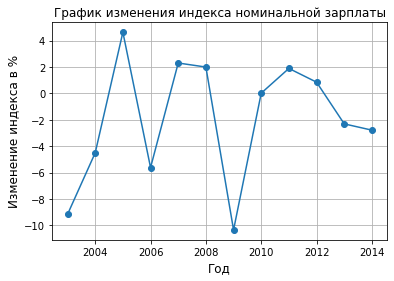

In [76]:
chindxs1 = [] # Массив изменения индекса в %
for i in range(0,12):
    chindxs1.append(indxs1[i+1]/indxs1[i]*100-100)
    
import matplotlib.pyplot as plt
#x = [2003, 2004, 2005]
x = np.arange(start=2003, stop=2015, step=1)

plt.figure("4")
plt.title("График изменения индекса номинальной зарплаты")
plt.plot(x, chindxs1, "-o")

plt.xlabel("Год", fontsize=12)
plt.ylabel("Изменение индекса в %", fontsize=12)
plt.grid(True)
plt.show()

<p><b>Задача 2.</b> Построить график изменения индекса потребительских цен в процентах (год-изменение индекса в %) </p>

In [18]:
indxs2 = []                                          # Массив из индексов потребительских цен
for i in range(2006,2015):                           #данные за 2003 - 2005 год отсутствуют
    indxs2.append(float(df2[i].replace(',','.')))    #замена символа "," в данных на "."

df_result_2 = pnd.DataFrame(indxs2[0:9], 
                            columns = ["Индекс потребительских цен"], 
                            index = range(2006, 2015))  

df_result_2

,Индекс потребительских цен
2006,110.57
2007,108.29
2008,112.69
2009,112.87
2010,106.66
2011,107.75
2012,105.29
2013,106.53
2014,107.23


<p>График изменения индекса в процентах (год-изменение индекса в %)</p> 


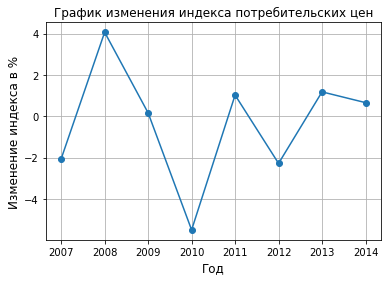

In [73]:
chindxs2 = [] # Массив изменения индекса в %
for i in range(0,8):
    chindxs2.append(float(indxs2[i+1])/float(indxs2[i])*100-100)

x = np.arange(start=2007, stop=2015, step=1) #данные за 2003 - 2005 год отсутствуют

plt.figure("4")
plt.title("График изменения индекса потребительских цен")
plt.plot(x, chindxs2, "-o")

plt.xlabel("Год", fontsize=12)
plt.ylabel("Изменение индекса в %", fontsize=12)
plt.grid(True)
plt.show()

<p><b>Задача 3.</b> Найти индексы реальной заработной платы, построить график изменения индекса в процентах (год-изменение индекса в %) </p>

In [20]:
indxs3 = []                                          # Массив из индексов реальных цен
for i in range(0,9):                                 
    indxs3.append(float(indxs1[i+4]/indxs2[i])*100)    

In [22]:
df_result_3 = pnd.DataFrame(indxs3[0:9], 
                            columns = ["Индекс реальной зарплаты"], 
                            index = range(2006, 2015))  # данные потребительских цен за 2003 - 2005 год отсутствуют

df_result_3

,Индекс реальной зарплаты
2006,107.757724
2007,112.560045
2008,110.324056
2009,98.743556
2010,104.510468
2011,105.410427
2012,108.789198
2013,105.036093
2014,101.439985


<p>График изменения индекса в процентах (год-изменение индекса в %)</p> 


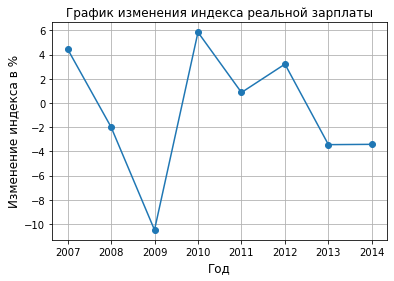

In [70]:
chindxs3 = [] # Массив изменения индекса в %
for i in range(0,8):
    chindxs3.append(float(indxs3[i+1])/float(indxs3[i])*100-100)

x = np.arange(start=2007, stop=2015, step=1) #данные за 2003 - 2005 год отсутствуют

plt.figure("4")
plt.title("График изменения индекса реальной зарплаты")
plt.grid(True)
plt.plot(x, chindxs3, "-o")

plt.xlabel("Год", fontsize=12)
plt.ylabel("Изменение индекса в %", fontsize=12)
plt.show()

<p><b>Задача 4.</b> Отобразить все три индекса на одном графике</p>

In [48]:
#Структура вывода
df_result_4 = pnd.DataFrame([[indxs1[4], indxs2[0], indxs3[0]],
                            [indxs1[5], indxs2[1], indxs3[1]],
                            [indxs1[6], indxs2[2], indxs3[2]],
                            [indxs1[7], indxs2[3], indxs3[3]],
                            [indxs1[8], indxs2[4], indxs3[4]],
                            [indxs1[9], indxs2[5], indxs3[5]],
                            [indxs1[10], indxs2[6], indxs3[6]],
                            [indxs1[11], indxs2[7], indxs3[7]],
                            [indxs1[12], indxs2[8], indxs3[8]]],
                            columns = ["Индекс номинальной зарплаты", 
                                       "Индекс потребительских цен", 
                                       "Индекс реальной зарплаты"], 
                            index = range(2006, 2015))

df_result_4

,Индекс номинальной зарплаты,Индекс потребительских цен,Индекс реальной зарплаты
2006,119.147716,110.57,107.757724
2007,121.891273,108.29,112.560045
2008,124.324179,112.69,110.324056
2009,111.451851,112.87,98.743556
2010,111.470865,106.66,104.510468
2011,113.579735,107.75,105.410427
2012,114.544146,105.29,108.789198
2013,111.894950,106.53,105.036093
2014,108.774096,107.23,101.439985


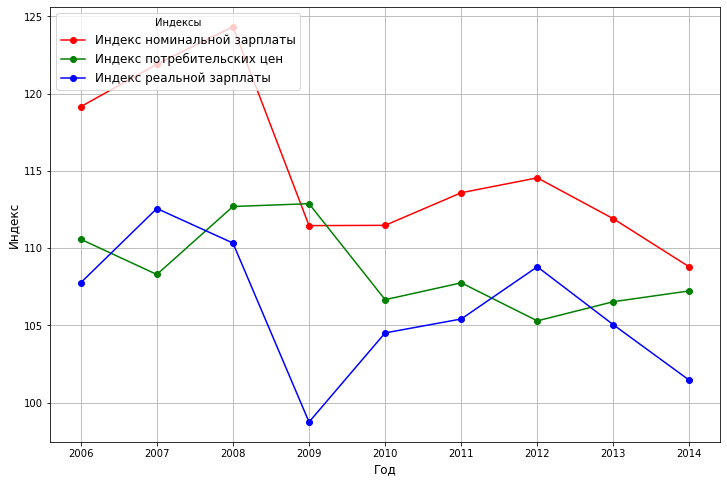

In [66]:
x = np.arange(start=2006, stop=2015, step=1) # данные потребительских цен за 2003 - 2005 год отсутствуют

plt.figure("4", figsize=[12, 8])
plt.plot(x, indxs1[4:13], "-ro", label="Индекс номинальной зарплаты")
plt.plot(x, indxs2[0:9], "-go", label="Индекс потребительских цен")
plt.plot(x, indxs3[0:9], "-bo", label="Индекс реальной зарплаты")

plt.grid(True)
plt.legend(loc=2, title="Индексы", fontsize=12)

plt.xlabel("Год", fontsize=12)
plt.ylabel("Индекс", fontsize=12)


plt.show()

<div style="font-size:18pt; padding-top:20px; text-align:center">Домашнее задание А1. <b>Дескриптивный анализ данных</b></div><hr>